# Analysis of ML Models

## Data Prep

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MATH 2327/50k_50k.csv')

In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    threshold = np.percentile(df[col].dropna(), 99)
    df.loc[df[col] > threshold, col] = threshold

<ipython-input-5-77a13ccdb20d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7745235.55' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > threshold, col] = threshold
<ipython-input-5-77a13ccdb20d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '63433.03999999998' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > threshold, col] = threshold
<ipython-input-5-77a13ccdb20d>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '117590857.99' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > threshold, col] = threshold
<ipython-input-5-77a13ccdb20d>:3: FutureWarning: Setting an item

In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

In [ ]:
# 1. Drop columns that are not useful for modeling:
#    Typically, identifier columns such as 'Unnamed: 0', 'Flow ID', 'Src IP', 'Dst IP', and Timestamp-related columns.
drop_cols = ['Unnamed: 0', 'Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
df = df.drop(columns=drop_cols)

In [ ]:
df['Label'] = df['Label'].apply(lambda x: 0 if x.lower()=='benign' else 1)

In [ ]:
# 3. For simplicity, we'll remove other categorical columns like 'Protocol'
#    or we can encode them. Here we drop 'Protocol' since it may not add too much value.
df = df.drop(columns=['Protocol'])

In [ ]:
# Check if there are any missing values:
print("Missing values in each column:")
print(df.isnull().sum())

# Optionally, fill or drop missing values. Here we'll drop rows with missing values.
df = df.dropna()

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

Missing values in each column:
Src Port         0
Dst Port         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 79, dtype: int64


## Model Analysis

In [ ]:
# Optionally, you may want to drop additional columns that are not numeric or relevant.
# For this example, we drop columns related to port numbers and IP addresses that might not be predictive.
cols_to_drop = ['Src Port', 'Dst Port']
X = X.drop(columns=cols_to_drop)

# At this point, X should be mostly numeric. Check the data types:
print("Features dtypes:")
print(X.dtypes)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Classification Report:\n", report)

Features dtypes:
Flow Duration      float64
Tot Fwd Pkts         int64
Tot Bwd Pkts         int64
TotLen Fwd Pkts    float64
TotLen Bwd Pkts    float64
                    ...   
Active Min         float64
Idle Mean          float64
Idle Std           float64
Idle Max           float64
Idle Min           float64
Length: 76, dtype: object
Accuracy: 98.94%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10041
           1       0.99      0.99      0.99      9911

    accuracy                           0.99     19952
   macro avg       0.99      0.99      0.99     19952
weighted avg       0.99      0.99      0.99     19952



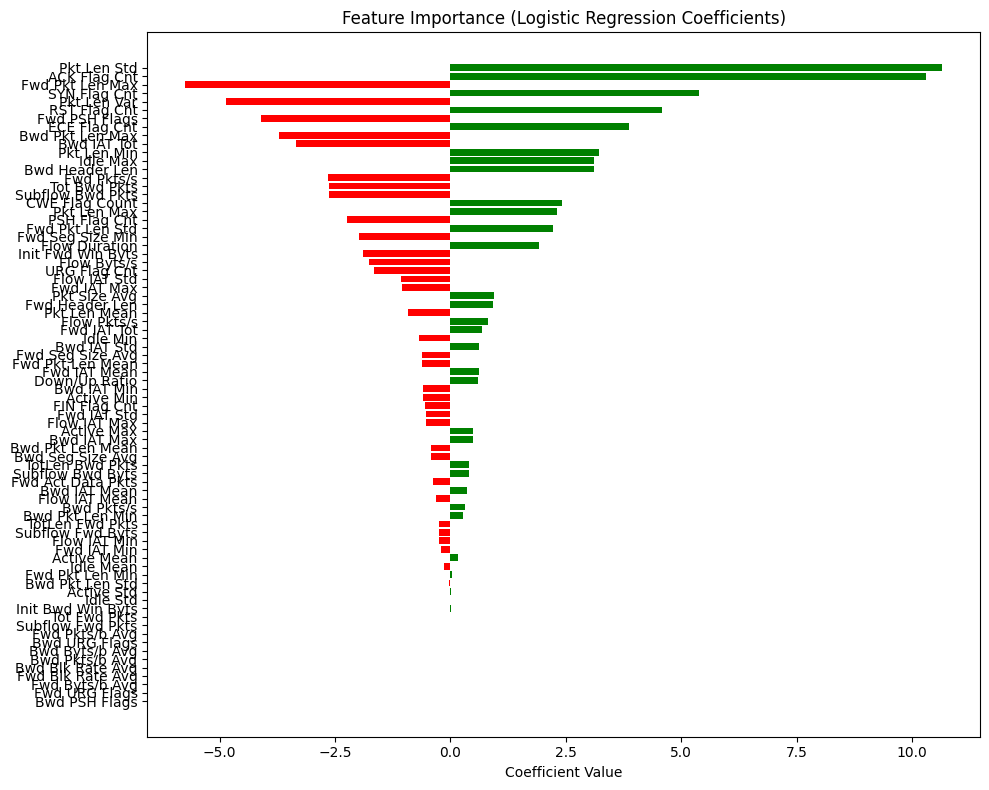

In [ ]:
# Extract the logistic regression model from the pipeline
logreg_model = pipeline.named_steps['logreg']

# Get the coefficients from the model (flatten in case of a single output)
coefficients = logreg_model.coef_[0]

# Get the feature names from the dataset X (ensure these match the features used in the model)
feature_names = X.columns

# Create a DataFrame with features and their corresponding coefficients
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort the DataFrame by the absolute coefficient value for a clearer plot
feat_imp_sorted = feat_imp.sort_values(by='Abs_Coefficient', ascending=True)

# Plot a horizontal bar graph for feature importance
plt.figure(figsize=(10, 8))
bars = plt.barh(feat_imp_sorted['Feature'], feat_imp_sorted['Coefficient'],
                color=feat_imp_sorted['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.show()

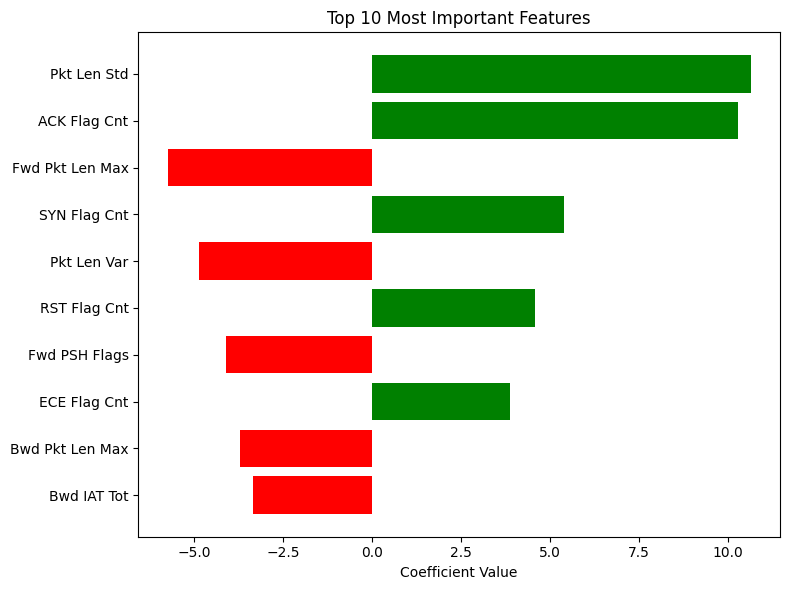

In [ ]:
# Extract the top 10 features by absolute coefficient value.
top10 = feat_imp.sort_values(by='Abs_Coefficient', ascending=True).tail(10)

# Plot the top 10 features in a horizontal bar chart.
plt.figure(figsize=(8, 6))
bars = plt.barh(top10['Feature'], top10['Coefficient'],
                color=top10['Coefficient'].apply(lambda x: 'green' if x > 0 else 'red'))
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


In [ ]:
top10_features = [
    "Pkt Len Std",
    "ACK Flag Cnt",
    "Fwd Pkt Len Max",
    "SYN Flag Cnt",
    "Pkt Len Var",
    "RST Flag Cnt",
    "Fwd PSH Flags",
    "ECE Flag Cnt",
    "Bwd Pkt Len Max",
    "Bwd IAT Tot"
]


## Logistic Regression Analysis

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

results_cumulative = []
features_removed_cumulative = []

# We'll start from the full set X and progressively remove more features
X_base = X.copy()

for feature in top10_features:
    # Add this feature to the cumulative list of removed features
    features_removed_cumulative.append(feature)

    # Drop all features in the cumulative list
    X_dropped = X_base.drop(columns=features_removed_cumulative)

    # Train/test split
    X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(
        X_dropped, y, test_size=0.2, random_state=42
    )

    # Build a pipeline
    pipeline_drop = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Train and evaluate
    pipeline_drop.fit(X_train_drop, y_train_drop)
    y_pred_drop = pipeline_drop.predict(X_test_drop)
    accuracy_drop = accuracy_score(y_test_drop, y_pred_drop)

    # Store results
    results_cumulative.append({
        'Features_Removed': features_removed_cumulative.copy(),
        'Accuracy': accuracy_drop
    })

# Convert results to DataFrame
results_cumulative_df = pd.DataFrame(results_cumulative)
print("Accuracy with cumulative removal of top features:")
print(results_cumulative_df)


Accuracy with cumulative removal of top features:
                                    Features_Removed  Accuracy
0                                      [Pkt Len Std]  0.988923
1                        [Pkt Len Std, ACK Flag Cnt]  0.984362
2       [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max]  0.984613
3  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.986267
4  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.985615
5  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.985315
6  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.986768
7  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.986317
8  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.986468
9  [Pkt Len Std, ACK Flag Cnt, Fwd Pkt Len Max, S...  0.986267


<ipython-input-16-c8567378fb1c>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


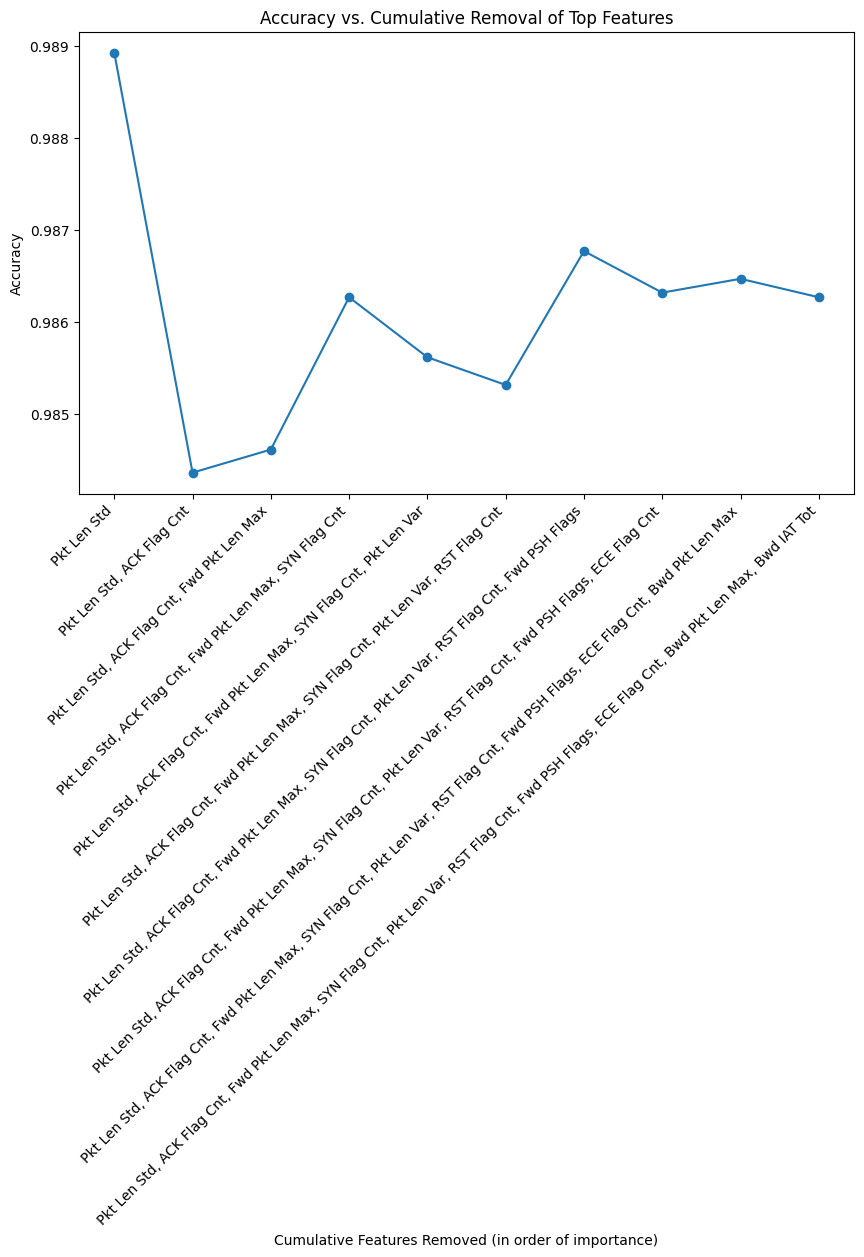

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(
    range(1, len(results_cumulative_df) + 1),
    results_cumulative_df['Accuracy'],
    marker='o'
)
plt.xticks(
    range(1, len(results_cumulative_df) + 1),
    [", ".join(item) for item in results_cumulative_df['Features_Removed']],
    rotation=45,
    ha='right'
)
plt.xlabel('Cumulative Features Removed (in order of importance)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Cumulative Removal of Top Features')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for regularization strength
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    # 'logreg__penalty': ['l1', 'l2'],  # Uncomment if you want to try both, but note solver compatibility.
}

# Use GridSearchCV to find the best regularization parameter
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Best parameters: {'logreg__C': 100}
Best cross-validation accuracy: 98.93%


## Decision Tree Model Analysis

Decision Tree Model Accuracy: 99.87%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10041
           1       1.00      1.00      1.00      9911

    accuracy                           1.00     19952
   macro avg       1.00      1.00      1.00     19952
weighted avg       1.00      1.00      1.00     19952

Feature Importances:
               Feature  Importance
67   Fwd Seg Size Min    0.681363
65  Init Bwd Win Byts    0.091115
12    Bwd Pkt Len Std    0.085507
18       Flow IAT Min    0.047888
66  Fwd Act Data Pkts    0.023124
..                ...         ...
60   Subflow Fwd Pkts    0.000000
70         Active Max    0.000000
72          Idle Mean    0.000000
73           Idle Std    0.000000
74           Idle Max    0.000000

[76 rows x 2 columns]


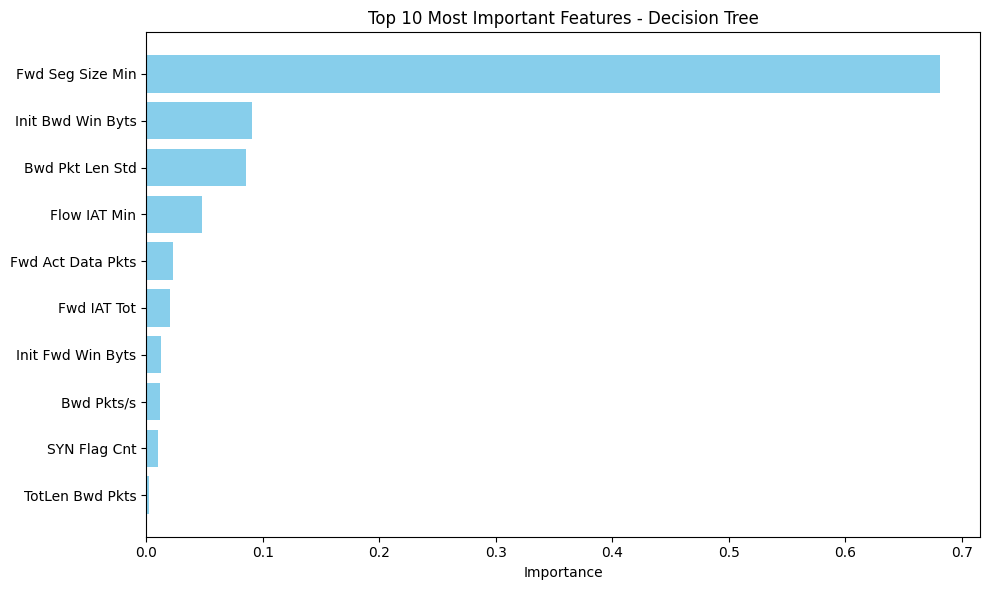

Individual Feature Removal Results (Decision Tree):
     Feature_Dropped  Accuracy
0   Fwd Seg Size Min  0.999098
1  Init Bwd Win Byts  0.996291
2    Bwd Pkt Len Std  0.998697
3       Flow IAT Min  0.998697
4  Fwd Act Data Pkts  0.998647
5        Fwd IAT Tot  0.998547
6  Init Fwd Win Byts  0.996842
7         Bwd Pkts/s  0.998747
8       SYN Flag Cnt  0.998496
9    TotLen Bwd Pkts  0.998697
Cumulative Feature Removal Results (Decision Tree):
                                    Features_Removed  Accuracy
0                                 [Fwd Seg Size Min]  0.999098
1              [Fwd Seg Size Min, Init Bwd Win Byts]  0.996141
2  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ...  0.996241
3  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ...  0.995990
4  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ...  0.995539
5  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ...  0.995640
6  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ...  0.994437
7  [Fwd Seg Size Min, Init Bwd Win Byts, Bwd Pkt ..

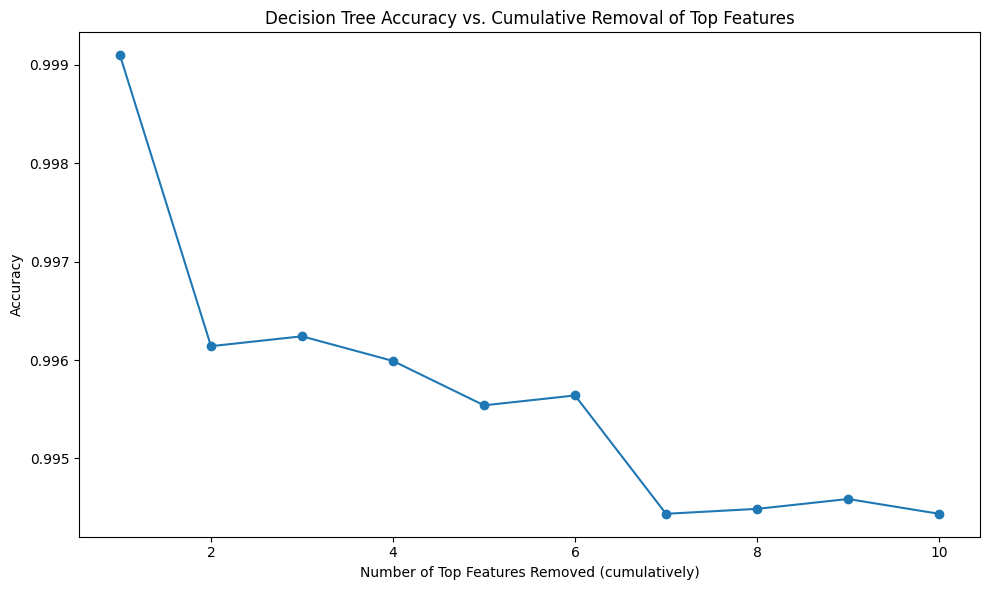

In [ ]:
# 2. Build and Evaluate the Decision Tree Model
# For decision trees, scaling is not strictly necessary.
pipeline_tree = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline_tree.fit(X_train, y_train)
y_pred = pipeline_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Model Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3. Feature Importance Graph for Decision Tree
dt_model = pipeline_tree.named_steps['dt']
feature_importances = dt_model.feature_importances_

# Create a DataFrame for feature importances
feat_imp_tree = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feat_imp_tree)

# Plot the top 10 most important features
top10_tree = feat_imp_tree.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_tree['Feature'][::-1], top10_tree['Importance'][::-1], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 Most Important Features - Decision Tree")
plt.tight_layout()
plt.show()

# 4A. Experiment: Individual Removal of Each Top Feature
results_individual_tree = []
for feature in top10_tree['Feature']:
    X_dropped = X.copy().drop(columns=[feature])
    X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(
        X_dropped, y, test_size=0.2, random_state=42
    )
    pipeline_drop_tree = Pipeline([
        ('dt', DecisionTreeClassifier(random_state=42))
    ])
    pipeline_drop_tree.fit(X_train_drop, y_train_drop)
    y_pred_drop = pipeline_drop_tree.predict(X_test_drop)
    acc_drop = accuracy_score(y_test_drop, y_pred_drop)
    results_individual_tree.append({
        'Feature_Dropped': feature,
        'Accuracy': acc_drop
    })

results_individual_tree_df = pd.DataFrame(results_individual_tree)
print("Individual Feature Removal Results (Decision Tree):")
print(results_individual_tree_df)

# 4B. Experiment: Cumulative Removal of Top Features
results_cumulative_tree = []
features_removed_cumulative = []
X_base_tree = X.copy()

for feature in top10_tree['Feature']:
    features_removed_cumulative.append(feature)
    X_dropped = X_base_tree.drop(columns=features_removed_cumulative)
    X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(
        X_dropped, y, test_size=0.2, random_state=42
    )
    pipeline_drop_tree = Pipeline([
        ('dt', DecisionTreeClassifier(random_state=42))
    ])
    pipeline_drop_tree.fit(X_train_drop, y_train_drop)
    y_pred_drop = pipeline_drop_tree.predict(X_test_drop)
    acc_drop = accuracy_score(y_test_drop, y_pred_drop)
    results_cumulative_tree.append({
        'Features_Removed': features_removed_cumulative.copy(),
        'Accuracy': acc_drop
    })

results_cumulative_tree_df = pd.DataFrame(results_cumulative_tree)
print("Cumulative Feature Removal Results (Decision Tree):")
print(results_cumulative_tree_df)

# Visualize the cumulative removal results
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(results_cumulative_tree_df) + 1),
    results_cumulative_tree_df['Accuracy'],
    marker='o'
)
plt.xlabel("Number of Top Features Removed (cumulatively)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Cumulative Removal of Top Features")
plt.tight_layout()
plt.show()

In [ ]:
# 1. Cross-Validation: Evaluate the decision tree using 5-fold cross-validation.
cv_scores_tree = cross_val_score(pipeline_tree, X, y, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy Scores:", cv_scores_tree)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores_tree.mean() * 100))

Decision Tree Cross-Validation Accuracy Scores: [0.99864675 0.99854651 0.99849639 0.99824579 0.99864675]
Mean CV Accuracy: 99.85%


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create a pipeline for the decision tree model
pipeline_tree = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Define a reduced parameter grid for the decision tree
param_grid_tree = {
    'dt__max_depth': [None, 10, 20, 30],          # Reduced range of max_depth values
    'dt__min_samples_split': [2, 5, 10],           # Fewer options for min_samples_split
    'dt__min_samples_leaf': [1, 2, 4]              # Fewer options for min_samples_leaf
}

# Set up RandomizedSearchCV to sample parameter combinations.
# n_iter controls how many parameter combinations will be tried.
random_search_tree = RandomizedSearchCV(
    estimator=pipeline_tree,
    param_distributions=param_grid_tree,
    n_iter=20,            # Sample 20 random combinations from the grid
    cv=5,
    scoring='accuracy',
    n_jobs=-1,            # Use all available CPU cores
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search_tree.fit(X, y)

print("Best parameters from RandomizedSearchCV:", random_search_tree.best_params_)
print("Best cross-validation accuracy: {:.2f}%".format(random_search_tree.best_score_ * 100))


Best parameters from RandomizedSearchCV: {'dt__min_samples_split': 2, 'dt__min_samples_leaf': 1, 'dt__max_depth': None}
Best cross-validation accuracy: 99.85%


Correlation with target:
ACK Flag Cnt        0.508631
Fwd Pkt Len Std     0.384186
CWE Flag Count      0.298095
Fwd Seg Size Avg    0.295808
Fwd Pkt Len Mean    0.295808
                      ...   
Fwd Pkts/b Avg           NaN
Fwd Blk Rate Avg         NaN
Bwd Byts/b Avg           NaN
Bwd Pkts/b Avg           NaN
Bwd Blk Rate Avg         NaN
Name: Label, Length: 76, dtype: float64


<ipython-input-61-dc37df89c2ee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_corr.index, y=label_corr.values, palette="viridis")


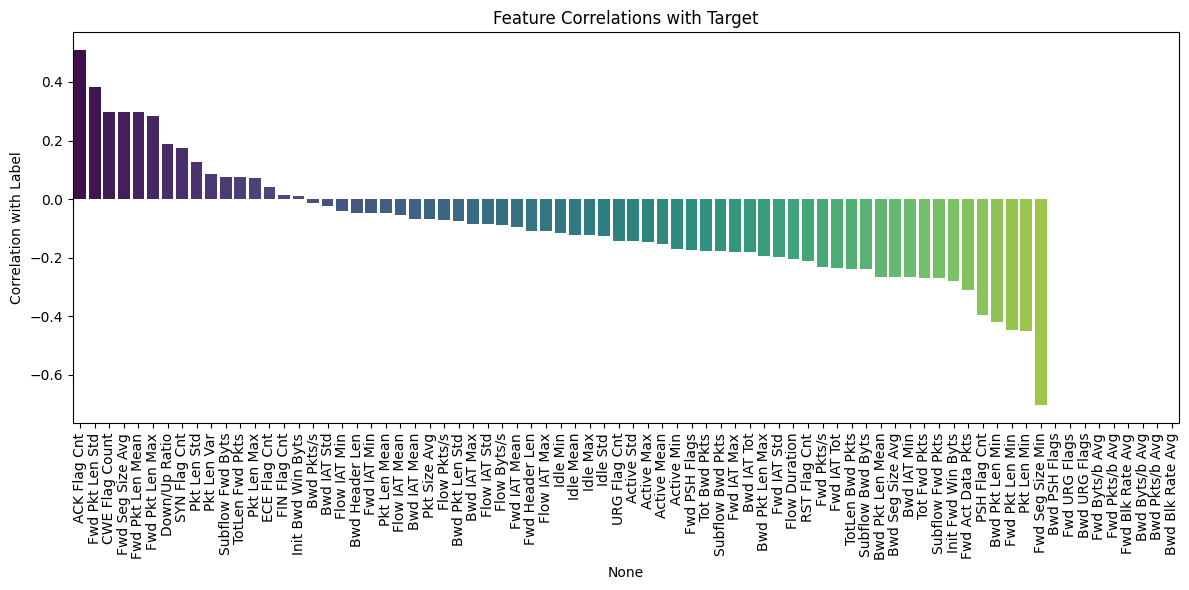

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your feature matrix and target variable
X_with_label = X.copy()
X_with_label['Label'] = y

# Compute correlation matrix
corr_matrix = X_with_label.corr()

# Extract correlation with the Label and sort
label_corr = corr_matrix['Label'].drop('Label').sort_values(ascending=False)
print("Correlation with target:")
print(label_corr)

# Visualize the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=label_corr.index, y=label_corr.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Correlation with Label")
plt.title("Feature Correlations with Target")
plt.tight_layout()
plt.show()


Mutual Information scores:
Init Bwd Win Byts    0.582058
Fwd Header Len       0.465713
Pkt Len Max          0.459547
Bwd Header Len       0.447597
TotLen Fwd Pkts      0.437070
                       ...   
Bwd PSH Flags        0.000459
Bwd URG Flags        0.000419
Bwd Pkts/b Avg       0.000196
Fwd URG Flags        0.000000
Fwd Byts/b Avg       0.000000
Length: 76, dtype: float64


<ipython-input-62-a667bdc12c84>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.index, y=mi_series.values, palette="coolwarm")


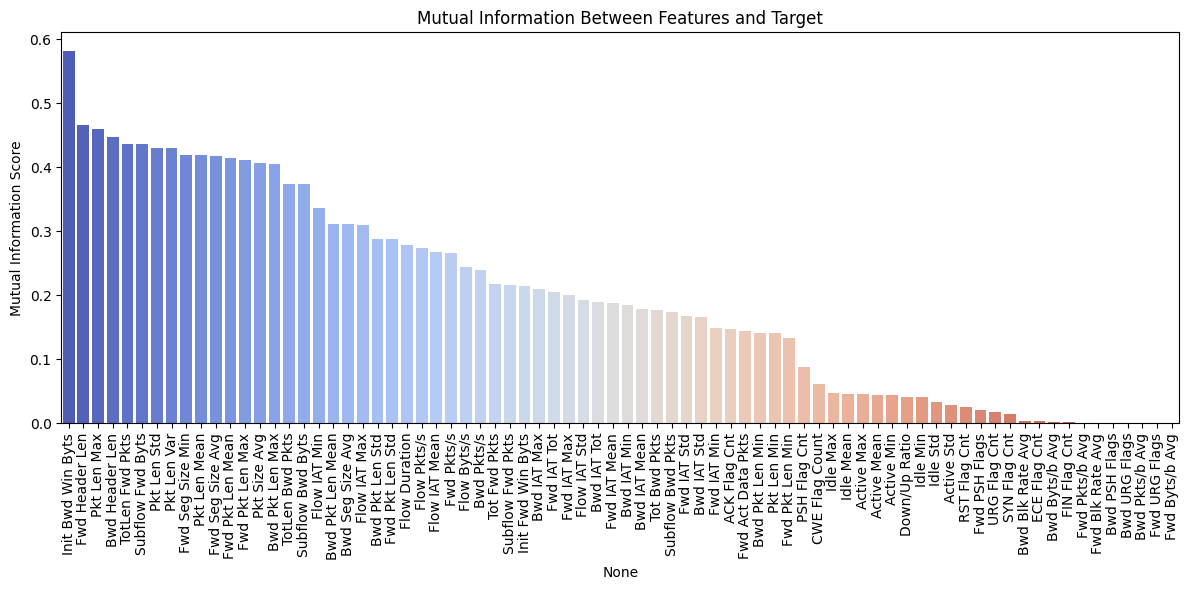

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information for each feature with respect to the target
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information scores:")
print(mi_series)

# Plot mutual information scores
plt.figure(figsize=(12, 6))
sns.barplot(x=mi_series.index, y=mi_series.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Between Features and Target")
plt.tight_layout()
plt.show()


<ipython-input-18-80bdb3636939>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="Fwd Seg Size Min", data=df, palette=["lightblue", "salmon"])


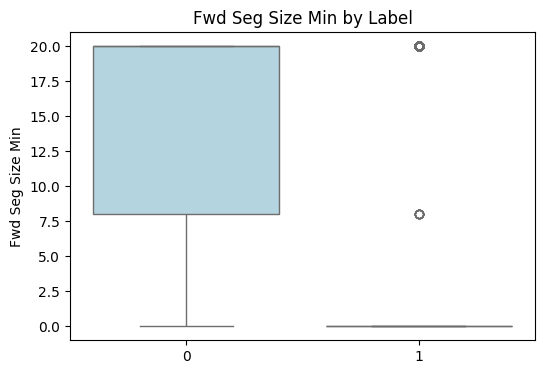

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x="Label", y="Fwd Seg Size Min", data=df, palette=["lightblue", "salmon"])
plt.title("Fwd Seg Size Min by Label")
plt.xlabel("")
plt.ylabel("Fwd Seg Size Min")
plt.show()


<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)
<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)


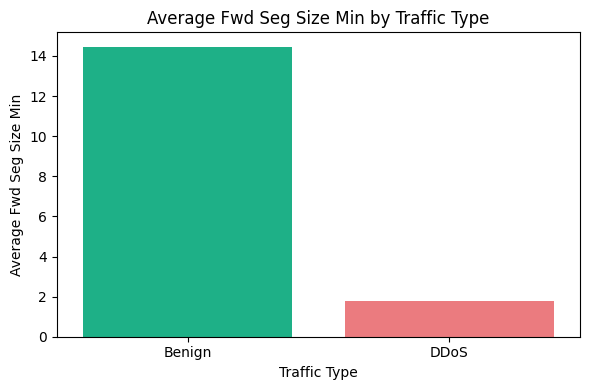

<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)
<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)


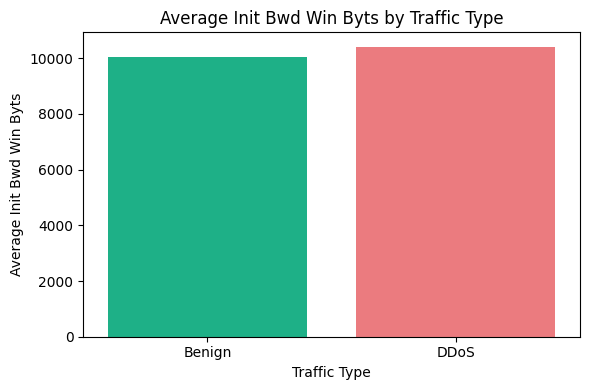

<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)
<ipython-input-20-c3b4cb0f0465>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)


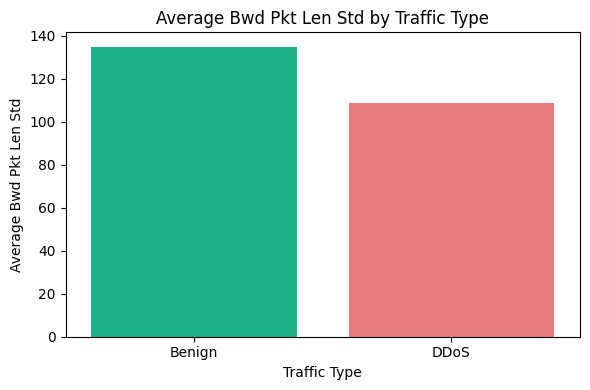

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure Traffic_Type is defined for clarity
# (If your Label column is 0/1, convert it as follows)
df['Traffic_Type'] = df['Label'].apply(lambda x: 'Benign' if x == 0 else 'DDoS')

# List of top 3 features to visualize
top3_features = [
    "Fwd Seg Size Min",
    "Init Bwd Win Byts",
    "Bwd Pkt Len Std"
]

# Define custom palette for the two traffic types
custom_palette = {'Benign': '#06C892', 'DDoS': '#FD696E'}

# Loop through each feature and plot a bar graph comparing the mean values by Traffic_Type
for feature in top3_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x="Traffic_Type", y=feature, data=df, estimator=np.mean, ci=None, palette=custom_palette)
    plt.title(f"Average {feature} by Traffic Type")
    plt.xlabel("Traffic Type")
    plt.ylabel(f"Average {feature}")
    plt.tight_layout()
    plt.show()


<ipython-input-69-7fd6534b6bcb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic_Type', y='Init Bwd Win Byts', data=df, palette='Set2')


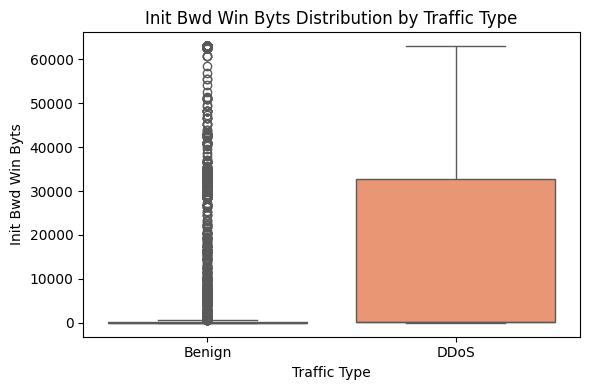

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='Traffic_Type', y='Init Bwd Win Byts', data=df, palette='Set2')
plt.title("Init Bwd Win Byts Distribution by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Init Bwd Win Byts")
plt.tight_layout()
plt.show()


In [ ]:
stats = df.groupby('Traffic_Type')['Init Bwd Win Byts'].describe()
print(stats)


                count          mean           std  min    25%    50%      75%  \
Traffic_Type                                                                    
Benign        49760.0  10030.401849  22215.370278 -1.0   -1.0   -1.0    258.0   
DDoS          50000.0  10412.448840  15195.560608 -1.0  211.0  225.0  32738.0   

                  max  
Traffic_Type           
Benign        62968.0  
DDoS          62968.0  


In [ ]:
import numpy as np

# Example: group by two features (binned) plus Traffic_Type
df['Fwd Seg Size Min (bin)'] = pd.cut(df['Fwd Seg Size Min'], bins=5)
pivot_table = df.pivot_table(
    values='Init Bwd Win Byts',
    index='Fwd Seg Size Min (bin)',
    columns='Traffic_Type',
    aggfunc=np.mean
)
print(pivot_table)


Traffic_Type                  Benign          DDoS
Fwd Seg Size Min (bin)                            
(-0.02, 4.0]             3432.442380  11420.743023
(4.0, 8.0]                 -1.000000     -1.000000
(16.0, 20.0]            16367.178591    104.499438


<ipython-input-71-849cc838a535>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(
<ipython-input-71-849cc838a535>:5: FutureWarning: The provided callable <function mean at 0x7b9ebdc013a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = df.pivot_table(


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


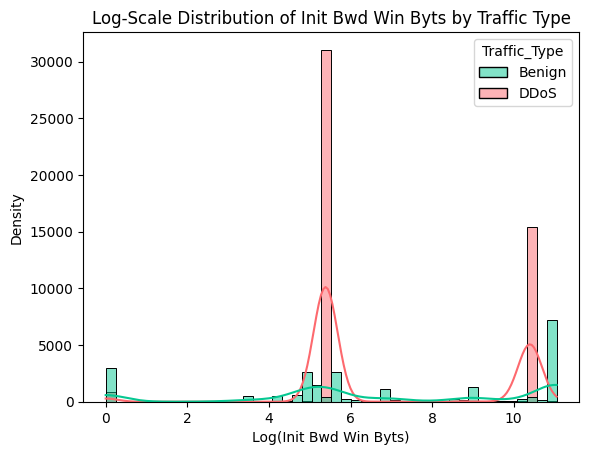

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a log-transformed column for Init Bwd Win Byts (handling zeros/negatives)
df['Init Bwd Win Byts (log)'] = np.log1p(df['Init Bwd Win Byts'])

# Define custom palette for the two traffic types
custom_palette = {'Benign': '#06C892', 'DDoS': '#FD696E'}

# Plot the histogram with KDE using the custom palette
sns.histplot(data=df, x='Init Bwd Win Byts (log)', hue='Traffic_Type', kde=True, palette=custom_palette)
plt.title("Log-Scale Distribution of Init Bwd Win Byts by Traffic Type")
plt.xlabel("Log(Init Bwd Win Byts)")
plt.ylabel("Density")
plt.show()



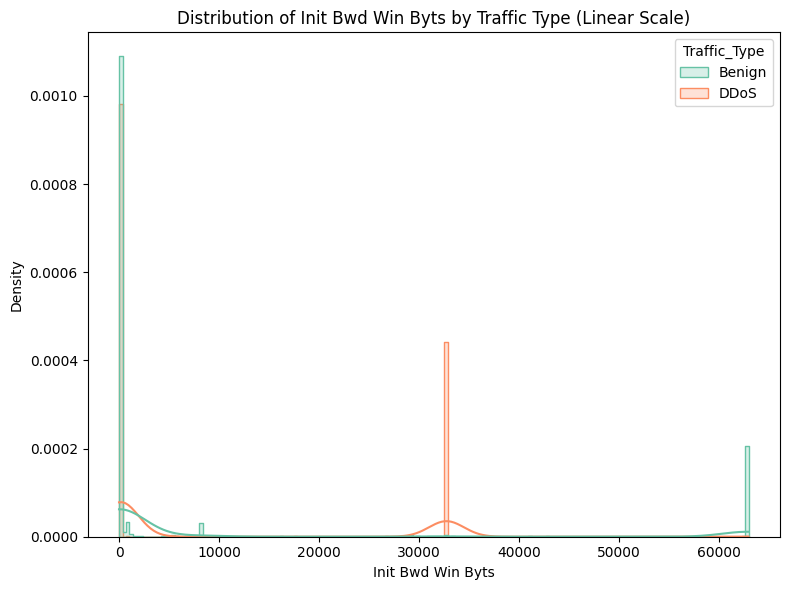

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Init Bwd Win Byts", hue="Traffic_Type", kde=True, stat="density", palette="Set2", element="step")
plt.title("Distribution of Init Bwd Win Byts by Traffic Type (Linear Scale)")
plt.xlabel("Init Bwd Win Byts")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def get_stats(x):
    return pd.Series({
         "Mean": x.mean(),
         "Median": x.median(),
         "Std": x.std(),
         "Variance": x.var(),
         "25th Percentile": x.quantile(0.25),
         "75th Percentile": x.quantile(0.75),
         "Skewness": skew(x),
         "Kurtosis": kurtosis(x)
    })

# Group by Traffic_Type and calculate stats for "Init Bwd Win Byts"
stats_df = df.groupby("Traffic_Type")["Init Bwd Win Byts"].apply(get_stats)
print("Summary Statistics for 'Init Bwd Win Byts':\n", stats_df)


Summary Statistics for 'Init Bwd Win Byts':
 Traffic_Type                 
Benign        Mean               1.003040e+04
              Median            -1.000000e+00
              Std                2.221537e+04
              Variance           4.935227e+08
              25th Percentile   -1.000000e+00
              75th Percentile    2.580000e+02
              Skewness           1.900656e+00
              Kurtosis           1.700932e+00
DDoS          Mean               1.041245e+04
              Median             2.250000e+02
              Std                1.519556e+04
              Variance           2.309051e+08
              25th Percentile    2.110000e+02
              75th Percentile    3.273800e+04
              Skewness           8.498757e-01
              Kurtosis          -1.151873e+00
Name: Init Bwd Win Byts, dtype: float64


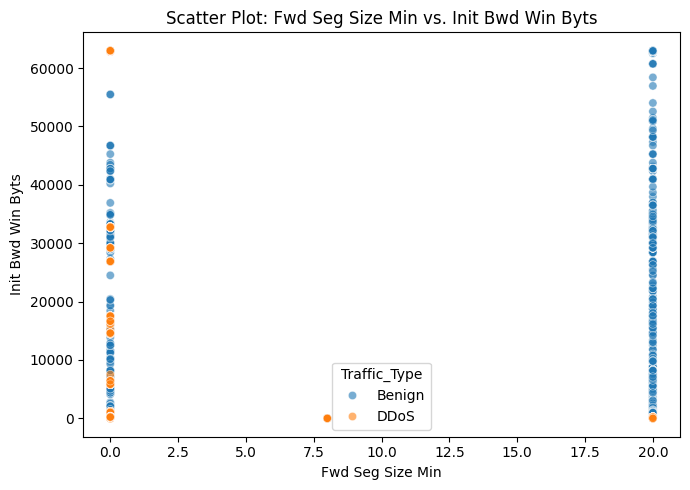

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.scatterplot(x="Fwd Seg Size Min", y="Init Bwd Win Byts", hue="Traffic_Type", data=df, alpha=0.6)
plt.title("Scatter Plot: Fwd Seg Size Min vs. Init Bwd Win Byts")
plt.xlabel("Fwd Seg Size Min")
plt.ylabel("Init Bwd Win Byts")
plt.tight_layout()
plt.show()


In [ ]:
df_full = pd.read_csv("/content/drive/MyDrive/MATH 2327/final_dataset_v3.csv")

In [ ]:
# Step 1: Prepare the df_full data
# Make sure to drop any columns that were dropped during training
columns_to_drop = ['Unnamed: 0', 'Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Protocol', 'Src Port', 'Dst Port']
df_full = df_full.drop(columns=[col for col in columns_to_drop if col in df_full.columns])

# Step 2: Ensure the label is encoded (0 = Benign, 1 = DDoS)

# Step 3: Cap extreme values like you did during training
import numpy as np

numeric_cols = df_full.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    col_data = df_full[col].replace([np.inf, -np.inf], np.nan)
    if col_data.dropna().empty:
        continue
    cap_value = np.percentile(col_data.dropna(), 99)
    df_full[col] = df_full[col].apply(lambda x: cap_value if (np.isinf(x) or x > cap_value) else x)

# Step 4: Drop missing values
df_full = df_full.dropna()

# Step 5: Separate features and labels
X_full = df_full.drop(columns=["Label"])
y_full = df_full["Label"]

# Step 6: Make predictions using the trained decision tree pipeline
y_pred_full = pipeline_tree.predict(X_full)

# Step 7: Evaluate
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_full, y_pred_full)
report = classification_report(y_full, y_pred_full)

print("Accuracy on df_full: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy on df_full: 99.83%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1591879
           1       0.00      0.00      0.00         0

    accuracy                           1.00   1591879
   macro avg       0.50      0.50      0.50   1591879
weighted avg       1.00      1.00      1.00   1591879



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


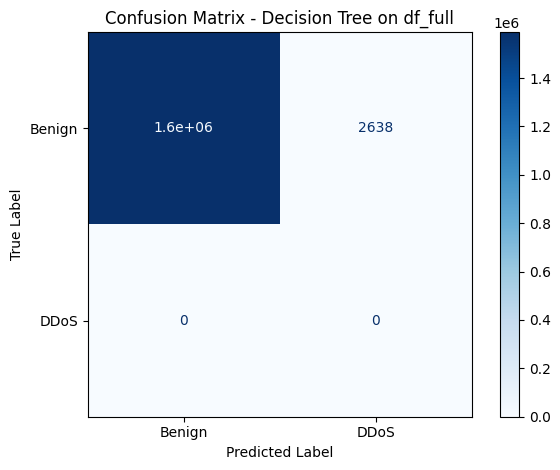

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_full, y_pred_full, labels=[0, 1])

# Visualize it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "DDoS"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree on df_full")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

y_shuffled = y.sample(frac=1.0, random_state=42).reset_index(drop=True)
model = DecisionTreeClassifier()
score = cross_val_score(model, X, y_shuffled, cv=5, scoring='accuracy').mean()

print(f"Accuracy after shuffling labels: {score:.2f}")


Accuracy after shuffling labels: 0.50


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for feature in X.columns:
    score = cross_val_score(DecisionTreeClassifier(), X[[feature]], y, cv=5, scoring='accuracy').mean()
    if score > 0.8:
        print(f"High accuracy from single feature: {feature} --> {score:.2f}")


High accuracy from single feature: TotLen Fwd Pkts --> 0.87
High accuracy from single feature: TotLen Bwd Pkts --> 0.83
High accuracy from single feature: Fwd Pkt Len Max --> 0.87
High accuracy from single feature: Fwd Pkt Len Mean --> 0.87
High accuracy from single feature: Bwd Pkt Len Max --> 0.84
High accuracy from single feature: Bwd Pkt Len Mean --> 0.80
High accuracy from single feature: Flow IAT Min --> 0.82
High accuracy from single feature: Fwd Header Len --> 0.89
High accuracy from single feature: Bwd Header Len --> 0.89
High accuracy from single feature: Pkt Len Max --> 0.89
High accuracy from single feature: Pkt Len Mean --> 0.87
High accuracy from single feature: Pkt Len Std --> 0.87
High accuracy from single feature: Pkt Len Var --> 0.87
High accuracy from single feature: Pkt Size Avg --> 0.87
High accuracy from single feature: Fwd Seg Size Avg --> 0.87
High accuracy from single feature: Bwd Seg Size Avg --> 0.80
High accuracy from single feature: Subflow Fwd Byts --> 0.8